Text(0, 0.5, 'Errors corrected')

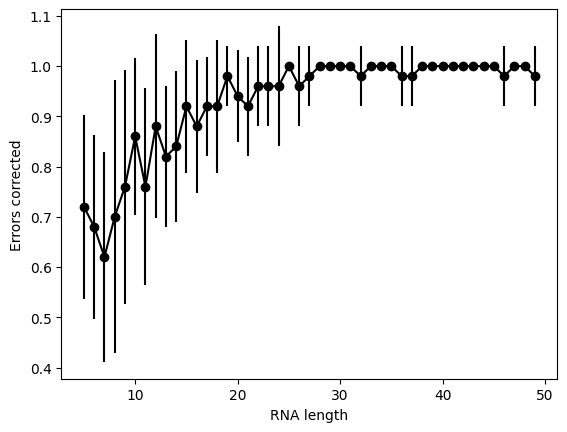

In [88]:
import numpy as np
from collections import Counter 

# Define the nucleotides
A, C, G, U = 0, 1, 2, 3

# Define the code correcting method
def correct_code(sequence, codes):
    distances = np.array([np.sum(sequence != code) for code in codes])
    min_distance = np.min(distances)
    if np.sum(distances == min_distance) > 1:
        return None
    else:
        return codes[np.argmin(distances)]

# Define the code size, message length, and mutation probability
k = 5
p = 0.4

success_averages = []

for n in range(5, 50):
  success_rates = []
  for i in range(10):
    # Generate a set of initial functional RNA sequences with specific motifs
    codes = np.random.randint(0, 4, size=(k, n))
    sequences = np.array([codes[i] for i in np.random.choice(k, size=k, replace=True)])

    # Perform the error-prone replication simulation
    successes = 0
    for i in range(k):
        sequence = sequences[i]
        replicated_sequence = np.zeros_like(sequence)
        for j in range(n):
            if np.random.rand() < p:
                replicated_sequence[j] = np.random.choice([nuc for nuc in (A, C, G, U) if nuc != sequence[j]])
            else:
                replicated_sequence[j] = sequence[j]
        corrected_sequence = correct_code(replicated_sequence, codes)
        if corrected_sequence is not None and np.all(corrected_sequence == sequence):
            successes += 1

    # Calculate the success rate
    success_rate = successes / k
    success_rates.append(success_rate)

  success_averages.append(success_rates)

plt.errorbar(range(5, 50), np.mean(np.array(success_averages),axis=1), yerr = np.std(np.array(success_averages),axis=1), marker = 'o', color = 'k')
plt.xlabel('RNA length')
plt.ylabel('Errors corrected')